## Importing data and reducing size

In [23]:
import cv2
import os

data_path='dataset'
categories=os.listdir(data_path)
labels=[i for i in range(len(categories))]

label_dict=dict(zip(categories,labels))

print(categories)
print(label_dict)
img_size=100
data=[]
target=[]


for category in categories:
    folder_path=os.path.join(data_path,category)
    img_names=os.listdir(folder_path)
    for img_name in img_names:
        img_path=os.path.join(folder_path,img_name)
        img=cv2.imread(img_path)
            
        try:
            gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)           
            resized=cv2.resize(gray,(img_size,img_size))
            data.append(resized)
            target.append(label_dict[category])

        except Exception as e:
            print('Exception:',e)


['without_mask', 'with_mask']
{'without_mask': 0, 'with_mask': 1}


In [24]:
import numpy as np

data=np.array(data)/255.0
data=np.reshape(data,(data.shape[0],img_size,img_size,1))
target=np.array(target)

from keras.utils import np_utils

new_target=np_utils.to_categorical(target)
np.save('data',data)
np.save('target',new_target)

## CNN

In [25]:
import numpy as np

data=np.load('data.npy')
target=np.load('target.npy')



In [26]:
from keras.models import Sequential
from keras.layers import Dense,Activation,Flatten,Dropout
from keras.layers import Conv2D,MaxPooling2D
from keras.callbacks import ModelCheckpoint

model=Sequential()

model.add(Conv2D(200,(3,3),input_shape=data.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(100,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(50,activation='relu'))
#Dense layer of 64 neurons
model.add(Dense(2,activation='softmax'))

model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [27]:
from sklearn.model_selection import train_test_split

train_data,test_data,train_target,test_target=train_test_split(data,target,test_size=0.1)

In [38]:
checkpoint = ModelCheckpoint('model-{epoch:03d}.model',monitor='val_loss',verbose=0,save_best_only=True,mode='auto')
history=model.fit(train_data,train_target,epochs=20,callbacks=[checkpoint],validation_split=0.2)

Epoch 1/20
87/87 [==============================] - 89s 1s/step - loss: 0.1275 - accuracy: 0.9534 - val_loss: 0.2995 - val_accuracy: 0.9004
Epoch 2/20
87/87 [==============================] - 89s 1s/step - loss: 0.0978 - accuracy: 0.9635 - val_loss: 0.2719 - val_accuracy: 0.9149
Epoch 3/20
87/87 [==============================] - 96s 1s/step - loss: 0.0711 - accuracy: 0.9769 - val_loss: 0.2561 - val_accuracy: 0.9120
Epoch 4/20
87/87 [==============================] - 96s 1s/step - loss: 0.0594 - accuracy: 0.9772 - val_loss: 0.2678 - val_accuracy: 0.9206
Epoch 5/20
87/87 [==============================] - 99s 1s/step - loss: 0.0364 - accuracy: 0.9874 - val_loss: 0.2846 - val_accuracy: 0.9149
Epoch 6/20
87/87 [==============================] - 104s 1s/step - loss: 0.0348 - accuracy: 0.9888 - val_loss: 0.2540 - val_accuracy: 0.9221
Epoch 7/20
87/87 [==============================] - 83s 957ms/step - loss: 0.0339 - accuracy: 0.9874 - val_loss: 0.2400 - val_accuracy: 0.9278
Epoch 8/20
87/87

KeyboardInterrupt: 

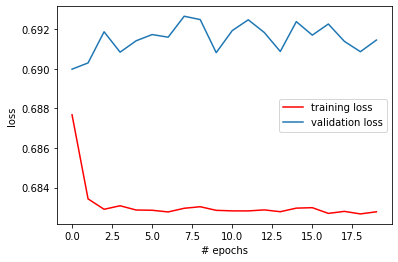

In [29]:
from matplotlib import pyplot as plt

plt.plot(history.history['loss'],'r',label='training loss')
plt.plot(history.history['val_loss'],label='validation loss')
plt.xlabel('# epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

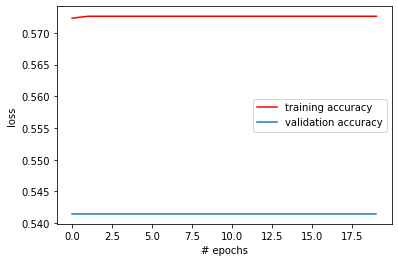

In [30]:
plt.plot(history.history['accuracy'],'r',label='training accuracy')
plt.plot(history.history['val_accuracy'],label='validation accuracy')
plt.xlabel('# epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [31]:
print(model.evaluate(test_data,test_target))

22/22 [==============================] - 5s 243ms/step - loss: 0.2514 - accuracy: 0.9221
[0.25135937333106995, 0.9220778942108154]


In [4]:
#Using haar
from keras.models import load_model
import cv2
import numpy as np
import numpy as np
model = load_model('model-007.model')
source=cv2.VideoCapture(r"C:\Users\Jerry\Desktop\video2.mp4")
#result = detector.detect_faces(img)
labels_dict={0:'NO MASK',1:'MASK'}
face_clsfr = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
color_dict={0:(0,255,0),1:(0,0,255)}

while(True):

    ret,img=source.read()
    gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    #result = detector.detect_faces(img)
    faces=face_clsfr.detectMultiScale(gray,2,5)  

    for x,y,w,h in faces:
    
        face_img=gray[y:y+w,x:x+w]
        resized=cv2.resize(face_img,(100,100))
        normalized=resized/255.0
        reshaped=np.reshape(normalized,(1,100,100,1))
        result=model.predict(reshaped)

        label=np.argmax(result,axis=1)[0]
      
        cv2.rectangle(img,(x,y),(x+w,y+h),color_dict[label],2)
        cv2.rectangle(img,(x,y-40),(x+w,y),color_dict[label],-1)
        cv2.putText(img, labels_dict[label], (x, y-10),cv2.FONT_HERSHEY_SIMPLEX,0.8,(255,255,255),2)
        
        
    cv2.imshow('LIVE',img)
    key=cv2.waitKey(25)
    
    if(key==27):
        break
        
cv2.destroyAllWindows()
source.release()

In [5]:
###MTCNN 
from mtcnn import MTCNN
import cv2
model = load_model('model-007.model')
source=cv2.VideoCapture(0)
#result = detector.detect_faces(img)
labels_dict={0:'NO MASK',1:'MASK'}
color_dict={0:(0,255,0),1:(0,0,255)}
cap = cv2.VideoCapture(0)
while True:
    # Capture frame-by-frame
    __, frame = cap.read()

    # Use MTCNN to detect faces
    detector = MTCNN()
    result = detector.detect_faces(frame)
    if result != []:
        for person in result:
            bounding_box = person['box']
            keypoints = person['keypoints']
            
            face_img=gray[bounding_box[1]:bounding_box[1]+bounding_box[3],bounding_box[0]:bounding_box[0]+bounding_box[2]]
            resized=cv2.resize(face_img,(100,100))
            normalized=resized/255.0
            reshaped=np.reshape(normalized,(1,100,100,1))
            result=model.predict(reshaped)
            cv2.rectangle(frame,
                          (bounding_box[0], bounding_box[1]),
                          (bounding_box[0] + bounding_box[2], bounding_box[1] + bounding_box[3]),
                          (0, 155, 255),
                          2)
            cv2.putText(img, labels_dict[label], (bounding_box[0], bounding_box[1]-10),cv2.FONT_HERSHEY_SIMPLEX,0.8,(255,255,255),2)


    # display resulting frame
    cv2.imshow('frame', frame)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
# When everything's done, release capture
cap.release()
cv2.destroyAllWindows()


In [7]:
!python --version

Python 3.7.6
